<a href="https://colab.research.google.com/github/k5yi/econ2005/blob/master/notebooks/02Numpy.ipynb">
  <img src="https://img.shields.io/badge/%EC%84%9C%EA%B0%95%EA%B2%BD%EC%A0%9C-2%20Numpy-crimson?labelColor=navy&logo=googlecolab&logoClolor=crimson" align='left'/>
</a> <br>



## NumPy - numerical python

- Numpy (대부분 'NUM-py', 간혹 'NUM-pee')는 수의 계산에 특화되어 있고, `ndarray` (multi-dimensional array)라는 대규모 자료 처리에 적합한 형식을 지원하는 명령어들의 모임이다.


- EDA에선 pandas의 DataFrame format을 주로 사용하지만 Scikit-learn 같은 경우 numpy array를 기본 자료유형으로 사용한다.
- Tensorflow와 pytorch는 numerical data에 특화된 numpy의 확장판


- `array`의 기본연산은 pair-wise로 그 크기와 배열에 주의한다. Vector나 matrix 연산은 별도의 명령어를 사용한다.


- 숫자 이외에 문자열 등을 원소하는 ndarray를 만들 수도 있지만, numpy는 이러한 형태의 자료를 다루기에 적합하지 않다.
- 여러 유형의 객체를 포함하는 자료를 다룰 때에는 이후에 배울 pandas를 사용한다.

In [1]:
import numpy as np
np.__version__

'1.20.3'

### ndarray의 생성

- Numpy의 기본 형식은 n-dimensional array 혹은 ndarray로 알려진 container 이다.

```python

numpy.array(object, dtype=None, copy=True, ndmin=0)
numpy.arange([start,] stop, [step,] dtype=None)
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)
```

- step size가 정수가 아니면 예상하지 못한 결과가 나올 수 있다. 이런 경우 `np.linspace()`를 사용하자.
- Default 값을 사용하면 `start`와 `stop`사이에서 같은 거리로 떨어져 있는 50개의 숫자를 생성한다.

In [2]:
w = np.array([1,2,3,4])
x = np.array(range(1,5))
y = np.arange(1,5)
z = np.linspace(1,4, num=4, endpoint=False, retstep=True)

print(w)
print(x)
print(y)
print(z) # z[1], z[-1]

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]
(array([1.  , 1.75, 2.5 , 3.25]), 0.75)


- `np.aranage`는 여러가지 자료유형에 대해 적용할 수 있다.

In [3]:
np.arange('2016-07', '2016-08', dtype='datetime64[D]')

array(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
       '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
       '2016-07-09', '2016-07-10', '2016-07-11', '2016-07-12',
       '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16',
       '2016-07-17', '2016-07-18', '2016-07-19', '2016-07-20',
       '2016-07-21', '2016-07-22', '2016-07-23', '2016-07-24',
       '2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28',
       '2016-07-29', '2016-07-30', '2016-07-31'], dtype='datetime64[D]')

- `np.logspace`는 `np.linspace()`와 마찬가지로 log scale에서 동일한 간격을 갖는 수열를 생성한다.
- start와 stop은 $\mathrm{ base^{start}, base^{stop} }$으로 사용한다.
- 작은 값에서 큰 변화가 있는 그래프를 그릴 때 유용하다.

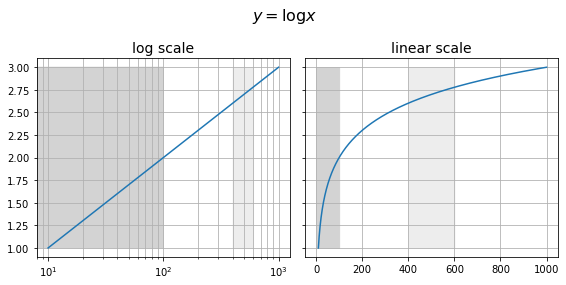

In [4]:
from matplotlib import pyplot as plt

x = np.logspace(1,3,1000)
y = np.log10(x)

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(8,4), sharey=True)
ax0.plot(x,y)
ax0.set_xscale('log')
ax0.grid(which='both')
ax0.set_title('log scale', fontsize=14)

ax1.plot(x,y)
ax1.grid()
ax1.set_title('linear scale', fontsize=14)

ax0.fill_betweenx(y, x1=0, x2=100, color='lightgray')
ax0.fill_betweenx(y, x1=400, x2=600, color='#ededed')

ax1.fill_betweenx(y, x1=0, x2=100, color='lightgray')
ax1.fill_betweenx(y, x1=400, x2=600, color='#ededed')

plt.suptitle(r'$y=\log x$', fontsize=16)
plt.tight_layout()

### Data types

Numpy는 자료유형을 자동으로 파악하지만 확실히 하려면 자료유형을 지정한다.<br>
Numpy에 다른 유형의 자료를 섞어서 사용하는 것은 가급적 피한다.

In [5]:
print(np.array([1, 2]).dtype)
print(np.array([1., 2.]).dtype)
print(np.array([1, 2], dtype=float).dtype)
print(np.array([1, {2}]).dtype)

int32
float64
float64
object


| NumPy type | Python type | Usage
| :--- | :--- | :---
| string_, unicode_, mixed types | str or mixed | Text or mixed numeric and non-numeric values
| int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | int | Integer numbers
| float_, float16, float32, float64 | float | Floating point numbers
| bool_ | bool | True/False values
| Datetime64[ns] | NA | Date and time values



### 차원, 축, 크기 dimension, axis, and shape

- `ndarray`는 숫자들을 n 차원으로 배열한 것으로 생각해 볼수 있다.
  - 일반적인 차원 개념과는 다르게 n 차원 array가 반드시 n 개의 원소를 갖는 것은 아니다.
  - 0차원은 하나의 숫자, 1차원은 벡터형태, 2차원은 행렬로 생각해도 무방하다.


- Numpy array의 축은 각괄호로 구분한다.
- `ndarray`의 차원은 `np.array.ndim`이나 `np.array.shape`, 혹은 출력물의 왼쪽 대괄호 갯수로 확인할 수 있다.


- Numpy의 axis는 좌표축과 유사한 개념으로 `shape`이 `(4,5,8)`인 array는 shape이 (5,8)인 네 개의 array, 다섯 개의 (4,8), 여덟 개의 (4,5)로 해석이 가능하다.
- `np.ndarray`에선 제일 왼쪽부터 순서대로 해석하므로, 가장 자연스런 해석은 네 개의 $5\times 8$ 행렬이다.

In [6]:
x = np.array([[1,2], [4,5]])
print('shape of x: ', x.shape)
print('size of x: ', x.size)
print()
print(np.array([[[1],[2]], [[4],[5]]]).shape)

shape of x:  (2, 2)
size of x:  4

(2, 2, 1)


- 1차원 객체는 용도에 따라 2차원으로도 표시가 가능하다. 실제 크기가 (n,) 이거나 (1,n) 인 ndarray 의 정보량은 차이가 없지만 연산에는 차원이 중요하므로 주의해야 한다.
- Python 은 자료의 유형이나 배열 등을 '유추'하여 연산을 할 수 있다.
- 오류를 덜 볼 수 있다는 장점이 있지만, 오류를 수정하기 어렵다는 단점이 같이 존재한다.


- Numpy array를 생성할 때는 이질적인 자료유형을 잘 사용하지 않는다.
- 각 축의 단면에 해당하는 array는 모든 위치에서 동일해야 한다.

In [7]:
np.array([[1,2,3], [4,5]])

<ipython-input-7-59ec0a84f344>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([[1,2,3], [4,5]])


array([list([1, 2, 3]), list([4, 5])], dtype=object)

In [8]:
list_array = np.array([[1,2,3], [4,5]], dtype=object)

print(list_array)
print(list_array.shape)
print(list_array[0])

[list([1, 2, 3]) list([4, 5])]
(2,)
[1, 2, 3]


<h3 span style="color:brown">  ndarray 생성 함수 </h3>

operation|result
:--- | :---
np.empty(shape[,dtype=float])|create a new uninitialized array
np.empty_like(a)|create an array of zeros with the same shape and dtype as a
np.zeros(shape[,dtype=float])|create a new array with zeros
np.zeros_like(a)|ditto
np.ones(shape[,dtype=float])|create a new array with ones
np.ones_like(a)|ditto
np.eye(n[,m=n,k=0,dtype=float])|create an $n \times m$ array where all elements are zero except the k$^{th}$ diagonal whose values equal to one
np.identity (n[,dtype=float])|create an $n \times n$ identity array (identical to np.eye())
np.diag(v[,k=0])|extracted diagonal or constructed diagonal array

In [9]:
print(np.zeros_like(w))
print(np.eye(2,4))
print(np.diag(np.identity(2)))

[0 0 0 0]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[1. 1.]


== 2.5로 이동

<h3 span style="color:brown"> 붙이기 </h3>

operation | result
:---|:---
np.stack(arrays, axis=0) | along a new axis, sequence of array-like
np.concatenate((a1,a2,...),axis=0) | along a existing axis
np.vstack((a1,a2,...))  | row-wise (axis=0)
np.hstack((a1,a2,...)) | column-wise (axis=1)
np.dstack((a1,a2,...))  | depth-wise (axis=2)
np.vsplit(ary,indices,axis=0) | split an array vertically, such as ary[:2], ary[2:3], ary[3:]
np.block(array) | form a block array
np.r_[a1, a2, ...] | row stack
np.c_[c1, c2, ...] | column stack, c1, c2 are 2D or higher arrays

In [7]:
import math

shape = (2,3,4)
size = math.prod(shape)

x = np.arange(size).reshape(shape)
y = np.random.RandomState(42).randint(-1, 5, size).reshape(shape)

print(x.shape, y.shape)

(2, 3, 4) (2, 3, 4)


In [8]:
print(np.stack((x,y)).shape)
print()
print(np.stack((x,y)))

(2, 2, 3, 4)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]]

  [[12 13 14 15]
   [16 17 18 19]
   [20 21 22 23]]]


 [[[ 2  3  1  3]
   [ 3  0  1  1]
   [ 1  3  2  1]]

  [[ 4  3  0  2]
   [ 4  4  0  2]
   [ 3 -1  2  0]]]]


In [18]:
print("hstack: ", np.hstack((x,y)).shape)
print("dstack: ", np.dstack((x,y)).shape)
print("vstack: ", np.vstack((x,y)).shape)

hstack:  (2, 6, 4)
dstack:  (2, 3, 8)
vstack:  (4, 3, 4)


### missing data

Numpy는 숫자에 특화된 package로 missing value는 그냥 missing value로 취급하여 연산한다. 실제 자료분석에서는 missing value를 삭제하거나 다른 값으로 바꾸어 사용한다. 관련 내용은 [여기](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)서 확인할 수 있다.

Python의 기본 missing value는 `np.nan` (`np.NaN`, `np.NAN`)과 `None`을 사용한다. `np.nan`은 실수이지만 논리 연산에 사용할 때는 주의해야 한다. `np.nan`은 float 이지만 값을 갖지 않는다. 

- 참고<br>
Pandas 자료유형에 포함된 missing value를 확인하기 위해서는 `np.isnan()` 이나 `pd.isna()`를 사용할 수 있다.
`np.isna`는 `np.nan`만 식별하며 (`None`의 자료유형이 object), `pd.isna`는 `None` type까지 missing value로 취급한다. `np.isnull`은 `np.isnan()`의 alias이다.

In [19]:
print(type(None))
print(type(np.nan))
print(None == None)
print(np.nan == np.nan)
print(np.nan!=np.nan)

<class 'NoneType'>
<class 'float'>
True
False
True


In [20]:
x=np.array([[1,2], [3, np.nan]])
print(np.isnan(x))
print(np.isnan(x).sum())

[[False False]
 [False  True]]
1


### 상수 constant

아래 값들은 모두 상수(real constant)로 취급한다. 따라서, numerical type인 np.array들은 오류없이 기본 연산을 적용할 수 있다.

np.inf (np.pinf), np.ninf <br>
np.e <br>
np.pi <br>
np.nan, np.NaN, np.NAN <br>

## indexing과 slicing

### indexing

- `np.ndarray`의 indexing 방법은 sequential 유형 자료와 유사하다. 다만 차원이 높으므로 각 차원의 위치를 comma로 구분한다. 
  - 3차원 array $x$의 각 원소는 tuple $(i,j,k)$로 표시한다.
  - $x[(i,j,k)]$은 0번째 축의 $i$번째, 1번축의 $j$번째, 2번축의 $k$번째 원소를 의미한다.


- index의 차원이 대상 array의 차원, 즉 축의 수보다 작으면 마지막 index 이후에는 해당 축의 원소 전체를 포함한다. 

In [38]:
x = np.arange(24).reshape(2,3,4)
print(x)
print()
print(x[(0,1)])

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

[4 5 6 7]


array([2, 2, 1, 2, 1])

### chained indexing


- `x[0,1]`과 `x[0][1]`은 동일한 값을 나타낸다. 하지만 chain index는 임시로 array `x[0]`를 만들어 저장하고, 다시 indexing을 하게 되므로 첫 번째 방법보다 더 많은 연산이 필요하다.
- 가능하면 tuple을 이용한다.

In [23]:
print(x[(0,1,-1)])
print(x[0,1,-1])
print()
print(x[0,][1,][-1,])
print(x[0][1][-1])

7
7

7
7


### slicing

- 기본 자료형과 마찬가지로 array의 slicing에도 기본적으로 list를 사용한다.
- 기본 자료형과 다르게 같은 index를 여러번 사용하여 같은 원소를 반복해서 추출할 수 있다.


- 각 축에 `slice()`나 `[start:stop:step]`를 따로 적용할 수 있다.
  - `slice()`는 range와 같은 방법으로 사용한다.
  - `x[(slice(),slice())]`

```python
ndarray[start:stop:step, start:stop:step, ...]
ndarray[slice(start,stop,step), slice(start,stop,step), ...]
```

In [53]:
x = np.array([[1,2], [3,4]])
print(x[[1,1,0,1,0], 0])

[3 3 1 3 1]


In [42]:
x = np.arange(12).reshape(2,3,2)
print(x)
print()
print(x[[0,1],[2,1]])
print()
print(x[1, :, 1:])

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]

[[4 5]
 [8 9]]

[[ 7]
 [ 9]
 [11]]


In [43]:
x = np.array([range(5), range(5,10), range(10,15)])
print(x)
print(x.shape)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)


In [44]:
print(x[slice(0,10), slice(3)]) # slice works!!
print()
print(x[range(2), slice(3)])

[[ 0  1  2]
 [ 5  6  7]
 [10 11 12]]

[[0 1 2]
 [5 6 7]]


### boolean masking

- 보통 조건을 이용하여 생성한 boolean으로 해당 array의 원소들을 선별한다.

In [26]:
y = x.copy()
mask = y <= 7
print(mask)
print(x[mask])

[[ True  True  True  True  True]
 [ True  True  True False False]
 [False False False False False]]
[0 1 2 3 4 5 6 7]


<h3 span style="color:brown"> 축의 추가와 삭제 </h3>

특정 축의 원소들이 필요하지 않거나 연산을 위해 새로운 축을 추가할 필요가 있을 경우 사용한다. 
    
- 새로운 축의 삽입

  - `np.newaxis`나 `None`을 해당 축의 위치에 삽입한다.
  - 축이 여러 개인 경우 `np.expand_dims(a, axis)` method가 편리할 수 있다.

    
- 기존 축의 제거
    
  - `np.squeeze(a, axis=None)`은 길이가 1인 축을 제거한다.
  - 여러 개의 축을 제거할 때는 slicing이 더 간편할 수 있다.

In [10]:
v = np.array(np.arange(12)).reshape(3,4)
w = v.reshape(3,4,1)
x = v[:,:,np.newaxis]
y = np.expand_dims(v,axis=1)
z = np.squeeze(v[:,:,None, np.newaxis])

### 축의 순서

- `np.swapaxes(a, axis1, axis2)`는 두 축을 바꾸고
- `np.moveaxis(a, source, destination)`는 축을 이동시킨다.
- `np.transpose(a, axes=None)`는 axes에 지정한 array의 순서대로 축을 바꾼다.

- 2차원 array의 경우 transpose로, `array.T`, 두 축을 바꿀 수 있다. 

### 모양 수정

```python
np.reshape(a, new_shape, order='C')
np.ndarray.reshape(new_shape, order='C')
    
np.resize(a, new_shape)
np.ndarray.resize(new_shape, refcheck=True)

np.ndarray.T # transposed array, reverse the order of axes
```

- order : C – C-like order, F – Fortran-like order
- reshape은 변환 전후 array의 size가 같아야 하며 길이 중 하나는 $-1$을 사용할 수 있다.
- `np.resize()`는 missing value를 원본의 복사본으로, `np.ndarray.resize()`는 0으로 채운다.
- `np.ndarray.shape = tuple`로 수정할 수도 있다.

In [11]:
y1=np.array([[1,2,3,4]])
y2=y1.reshape(2,2)
print(y1.shape, y2.shape)
print(y1)
print()
print(y2)

(1, 4) (2, 2)
[[1 2 3 4]]

[[1 2]
 [3 4]]


In [12]:
x = np.arange(1*2*3*4).reshape(2,-1)
print(f"x.ndim = {x.ndim}, x.shape = {x.shape} \n \n", x)

x.ndim = 2, x.shape = (2, 12) 
 
 [[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]]


In [13]:
x = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print(x)
x.resize((3,5))
print(x)
#np.resize(x,(3,5))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12  0  0  0]]


임의의 array를 1차원으로 바꿀 때는 다음의 명령어들을 사용한다.

`np.ndarray.ravel()`, `np.ndarray.flatten()`, `np.ndarray.reshape(-1,)`

ravel과 reshape은 view, flatten은 copy를 return 한다.<br>
ravel은 array이외에도 사용할 수 있지만 flatten과 reshape은 array에만 정의된 method이다.

In [14]:
print(np.squeeze(x[:,1])) # remove redundant axis whose length is one
print(x.flatten())
print(x.ravel())

[ 2  7 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12  0  0  0]
[ 1  2  3  4  5  6  7  8  9 10 11 12  0  0  0]


In [15]:
v = np.array([[[0], [1], [2]]])  # shape = (1,3,1)

print(np.squeeze(v,axis=2))
print(v.reshape(1,3))
print(np.squeeze(v))                # delete all the unit length axes

[[0 1 2]]
[[0 1 2]]
[0 1 2]


### array 수정

```python
np.insert(array,obj,values,axis=None)
np.delete(array,obj,axis=None)
np.append(array,values,axis=None) # axis를 지정하지 않으면 1차원 array로 만든다
np.where(condition[,x,y])
```

In [27]:
z = np.array([1,2,3])
print(np.insert(z,2,5)) # position 2 에 5를 삽입

[1 2 5 3]


In [28]:
print(np.insert(x, 2, 5)) # x를 1d array로 만든 후 position 2 에 5를 삽입
print()
print(np.insert(x, 2, 5, axis=1)) # x의 두 번째 column 자리에 5를 삽입 (broadcasting)
print()
print(np.insert(x, 2, [-1,-2,-3], axis=1))

[ 0  1  5  2  3  4  5  6  7  8  9 10 11 12 13 14]

[[ 0  1  5  2  3  4]
 [ 5  6  5  7  8  9]
 [10 11  5 12 13 14]]

[[ 0  1 -1  2  3  4]
 [ 5  6 -2  7  8  9]
 [10 11 -3 12 13 14]]


In [29]:
print(np.append(x, [-1]*3))
print()
print(np.append(x, np.array([[-1,-1,-1]]).reshape(3,1), axis=1))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 -1 -1 -1]

[[ 0  1  2  3  4 -1]
 [ 5  6  7  8  9 -1]
 [10 11 12 13 14 -1]]


- `np.where(condition[,x,y])` 는 일정한 기준에 따라 array 원소의 값을 일괄적으로 바꾼다.

  - `np.where(condition)`는 조건을 만족하는 원소의 index를 보여준다.<br> 이 index를 이용하여 해당 원소를 골라낼 수 있다.<br>
  - `a[np.where(condition)]`


- `np.where(condition,x,y)`를 사용하여 조건에 해당하는 원소를 직접 바꿀 수 있다. 기능은 다음과 같다.

  - `[xv if c else yv for (c,xv,yv) in zip(condition,x,y)]`

In [30]:
x = np.arange(4,19,3)
idx = np.where( x >= 10 )

print(x)
print(idx)
print(x >= 10)

[ 4  7 10 13 16]
(array([2, 3, 4], dtype=int64),)
[False False  True  True  True]


In [31]:
idx = np.argmax(x) # np.argmin works in the same way
print(idx)
print(np.where(x==x.max()))

4
(array([4], dtype=int64),)


In [32]:
print(np.where(x >= 10, 1, -1))
print(np.where(x >= 10, np.nan, x))

[-1 -1  1  1  1]
[ 4.  7. nan nan nan]


기본자료유형과 마찬가지로 자료의 일부를 추출하여 수정할 때는 명시적으로 복사본을 만드는 것이 좋다.

```python
np.copyto(destination,source)
np.copy()
```

https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html

In [33]:
x = np.arange(4).reshape(2,2)
print(x)

y = np.zeros_like(x)
np.copyto(y, x)

y[0,0] = -1

print(x)
print(y)

[[0 1]
 [2 3]]
[[0 1]
 [2 3]]
[[-1  1]
 [ 2  3]]


## ndarray의 연산


### 기본 연산자

- 통상적인 숫자 자료와 마찬가지로 `+, -, *, /, %, **`등의 기본 연산자가 정의되어 있다.

- element-wise 연산이므로 기본적으로 피연산자의 크기가 동일해야 하며, 결과 역시 피연산자의 크기와 동일하다.

In [34]:
x = np.array([1,2])
y = np.array([-1,0])

print(x/y)

[-1. inf]


<ipython-input-34-2fa1e699ec9c>:4: RuntimeWarning: divide by zero encountered in true_divide
  print(x/y)


In [35]:
np.arange(12).reshape(3,4) / np.arange(12,24).reshape(3,4)

array([[0.        , 0.07692308, 0.14285714, 0.2       ],
       [0.25      , 0.29411765, 0.33333333, 0.36842105],
       [0.4       , 0.42857143, 0.45454545, 0.47826087]])

### ndarray의 함수

operation|result
:-- | :---
np.abs(), np.fabs()|fabs is faster for non-complex-valued data
np.sqrt(), np.sqare()|sqare root/square equivalent to \*\*0.5 and \*\*2
np.exp()|expoential
np.log , log10 , log2 , log1p() | log1p(x)= ln(1+x)
np.sign()|sign, 1 for positive, -1 for negative, 0 for zero
np.ceil(), np.floor()|returns ceiling, floor
np.int()|nearest integer preserving dtype
np.modf()|returns fractional parts and integer parts <br>frac,int = np.modf(a)
np.cos(), np.cosh(), np.sin() <br> np.sinh(), np.tan(), np.tanh()|regular and hyperbolic trigonometric functions
np.arc*()|inverse of trigonometric functions

<h3 span style="color:brown"> 유용한 ndarray methods </h3>

- 모두 함수형태로도 정의되어 있다.
- `axis = None` 인 경우 array 를 1차원으로 바꾸어서 함수를 적용

operation|result
:-- | :---
a.sort([,axis=None])|sorts a in place
a.sum([,axis=None])|create a new uninitialized array
a.mean(a[,axis=None])|arithmetic mean along the specified axis;<br>axis=0 : along columns, axis=1 : along rows
a.max(a[,axis=None]) <br>a.min()|maximum/minimum value
a.cumsum(axis=None)<br>a.cumprod()|cumulative sum/product of the elements of a
a.var([axis=None))<br>a.std()|variance and standard deviation
a.transpose([v])|returns the transpose of a, equivalent to a.T
a.argmax()|returns the index of the maximal argument
a.searchsorted(v)|returns the index where elements of v should be inserted in a to maintain the order

<span style="color:navy; font-size:1.25em"> ndarray method and numpy functions

- 대부분의 numpy의 연산은 함수와 method 두 가지 형태를 모두 사용할 수 있다.
    - `array.sum()`, `array.dot()`
    - option에 약간의 차이가 있기도 하지만 이름이 같은 경우는 동일한 기능

## Numpy Multiplication

- Numpy에서 많이 사용하는 중요한 연산은 대부분 함수로 제공하고 있다.
- 대부분의 연산은 경제수리기초의 것과 동일하지만, 3개 이상의 축을 갖는 array의 dot과 matmul 연산은 쉽게 보기 어려우므로 적당한 설명을 찾아 익혀두자. [참고 사이트](https://m.blog.naver.com/cjh226/221356884894)

## broadcasting

- NumPy의 연산은 같은 위치에 있는 원소끼리 이루어지므로 같은 크기에 대해서 적용된다. 유일한 예외는 ***broadcasting*** 으로, 만일 어떤 축의 크기가 1이면 대응되는 array의 해당 축의 size에 맞게 자동으로 조정된다.


- 예를 들어, (s1, 1, s2)와 (s1, k, s2)에 연산을 적용하면 앞의 operand에서 처음과 마지막 축을 k번 복사하여 (s1, k, s2)으로 만들어 계산한다.

<h2 style="color:gray"> example. driving distance between cities along 경부고속도로 </h2>


서울 - 수원 22.4 - 오산 13.8 - 천안 38.1 - 대전 67.0 - 대구 152.0 - 부산 123.0

In [36]:
city = ["서울", "수원", "오산", "천안", "대전", "대구", "부산"]
distance_between_cities = np.array([0,22.4,13.8,38.1,67,152,123])
mileposts = np.cumsum(distance_between_cities)

# broadcasting (7,) - (7,1) ==> (1,7) - (7,1)
distance = mileposts.reshape(1,7) - np.expand_dims(mileposts, axis=1)
print(distance)

[[   0.    22.4   36.2   74.3  141.3  293.3  416.3]
 [ -22.4    0.    13.8   51.9  118.9  270.9  393.9]
 [ -36.2  -13.8    0.    38.1  105.1  257.1  380.1]
 [ -74.3  -51.9  -38.1    0.    67.   219.   342. ]
 [-141.3 -118.9 -105.1  -67.     0.   152.   275. ]
 [-293.3 -270.9 -257.1 -219.  -152.     0.   123. ]
 [-416.3 -393.9 -380.1 -342.  -275.  -123.     0. ]]


- 다음 과정은 결과를 markdown의 table로 출력하기 위해 기호를 삽입하는 과정으로 Numpy array에 여러 유형의 자료를 섞어 놓으면 추가적인 연산은 굉장히 어려워진다.

In [37]:
distance = np.where(distance < 0, "", distance.round(1))
distance = np.concatenate((np.array(city).reshape(1,-1), distance), axis = 0)
distance = np.concatenate((np.array(["도시간 거리"] + city).reshape(-1,1),
                           distance), axis = 1)
print(distance)

[['도시간 거리' '서울' '수원' '오산' '천안' '대전' '대구' '부산']
 ['서울' '0.0' '22.4' '36.2' '74.3' '141.3' '293.3' '416.3']
 ['수원' '' '0.0' '13.8' '51.9' '118.9' '270.9' '393.9']
 ['오산' '' '' '0.0' '38.1' '105.1' '257.1' '380.1']
 ['천안' '' '' '' '0.0' '67.0' '219.0' '342.0']
 ['대전' '' '' '' '' '0.0' '152.0' '275.0']
 ['대구' '' '' '' '' '' '0.0' '123.0']
 ['부산' '' '' '' '' '' '' '0.0']]


In [38]:
for i in range(distance.shape[0]):
    print("|", end="")
    for j in range(distance.shape[1]):
        print(distance[i,j], end="|")
    print()

|도시간 거리|서울|수원|오산|천안|대전|대구|부산|
|서울|0.0|22.4|36.2|74.3|141.3|293.3|416.3|
|수원||0.0|13.8|51.9|118.9|270.9|393.9|
|오산|||0.0|38.1|105.1|257.1|380.1|
|천안||||0.0|67.0|219.0|342.0|
|대전|||||0.0|152.0|275.0|
|대구||||||0.0|123.0|
|부산|||||||0.0|


|도시간 거리|서울|수원|오산|천안|대전|대구|부산|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|서울|0.0|22.4|36.2|74.3|141.3|293.3|416.3|
|수원||0.0|13.8|51.9|118.9|270.9|393.9|
|오산|||0.0|38.1|105.1|257.1|380.1|
|천안||||0.0|67.0|219.0|342.0|
|대전|||||0.0|152.0|275.0|
|대구||||||0.0|123.0|
|부산|||||||0.0|

## Subpackages

Numpy의 subpackage 중 [numpy.random](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random)과 [numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html) 은 굉장히 유용하다. 어떤 기능들이 있는지 한번씩 살펴본다.

```python
np.random.randint(low, high=None, size=None, dtype=int)
np.random.randn(d0, d1, ..., dn)
np.random.choice(a, size=None, replace=True, p=None)
np.random.shuffle(x) # in-place

np.random.seed(42)
np.random.RandomState(42)...
```

In [39]:
np.random.randint(-10, 4, 10)

array([ -4,   0,  -5,  -7,  -9,  -3, -10,  -3,  -8,  -4])

In [40]:
np.random.RandomState(42).choice([0,1], size=4, p=(.6,.4))

array([0, 1, 1, 0])

In [41]:
w, v = np.linalg.eig(np.arange(9).reshape(3,3))
print(w)
v

[ 1.33484692e+01 -1.34846923e+00 -1.26963291e-15]


array([[ 0.16476382,  0.79969966,  0.40824829],
       [ 0.50577448,  0.10420579, -0.81649658],
       [ 0.84678513, -0.59128809,  0.40824829]])